In [4]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

# DESCRIPTION OF DATASET

Dataset link : https://www.kaggle.com/datasets/arezaei81/heartcsv 

age: Age of the individual.

sex: Gender (1 = male, 0 = female).

cp: Chest pain type (categorical: 0-3).

trestbps: Resting blood pressure (in mm Hg).

chol: Serum cholesterol (in mg/dl).

fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).

restecg: Resting electrocardiographic results (categorical: 0-2).

thalach: Maximum heart rate achieved.

exang: Exercise-induced angina (1 = yes, 0 = no).

oldpeak: ST depression induced by exercise relative to rest.

slope: The slope of the peak exercise ST segment (categorical: 0-2).

ca: Number of major vessels (0-3) colored by fluoroscopy.

hal: Thalassemia (categorical: 0-3).

target: Heart disease diagnosis (1 = disease, 0 = no disease).

In [13]:
# Load the dataset
df=pd.read_csv('heart.csv')

# Display first five rows
print(df.head(5))

print("*"*100)

# Basic information about the dataset
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 

In [15]:
# Handling missing values
# Replace missing values with column mean
imputer = SimpleImputer(strategy="mean") 
prep_data = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print(prep_data)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  3.0     145.0  233.0  1.0      0.0    150.0    0.0      2.3   
1    37.0  1.0  2.0     130.0  250.0  0.0      1.0    187.0    0.0      3.5   
2    41.0  0.0  1.0     130.0  204.0  0.0      0.0    172.0    0.0      1.4   
3    56.0  1.0  1.0     120.0  236.0  0.0      1.0    178.0    0.0      0.8   
4    57.0  0.0  0.0     120.0  354.0  0.0      1.0    163.0    1.0      0.6   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  57.0  0.0  0.0     140.0  241.0  0.0      1.0    123.0    1.0      0.2   
299  45.0  1.0  3.0     110.0  264.0  0.0      1.0    132.0    0.0      1.2   
300  68.0  1.0  0.0     144.0  193.0  1.0      1.0    141.0    0.0      3.4   
301  57.0  1.0  0.0     130.0  131.0  0.0      1.0    115.0    1.0      1.2   
302  57.0  0.0  1.0     130.0  236.0  0.0      0.0    174.0    0.0      0.0   

     slope   ca  thal  target  
0      0.0  0.0   1

# EXPLORATORY DATA ANALYSIS







In [18]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [20]:
# Summary statistics
print("Summary statistics:")
print(df.describe())

Summary statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std    

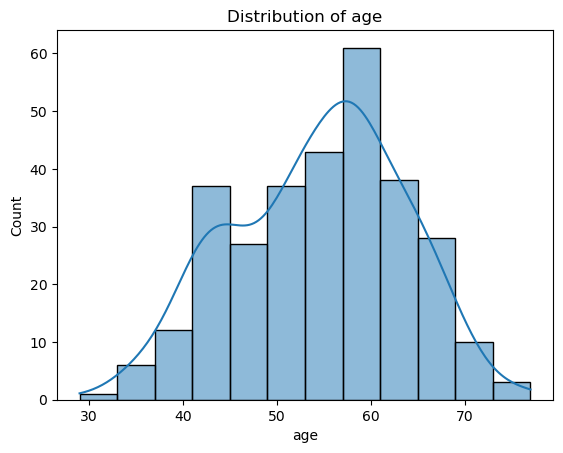

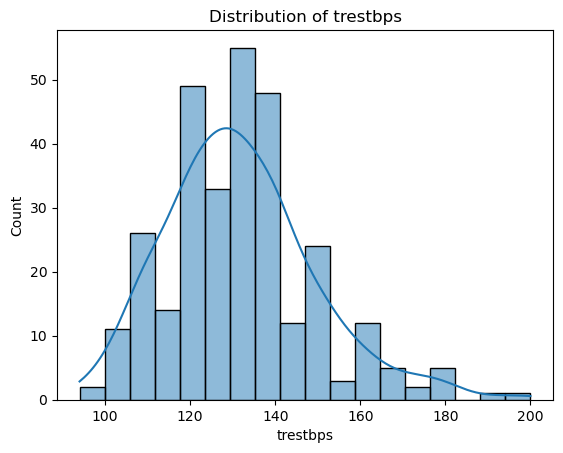

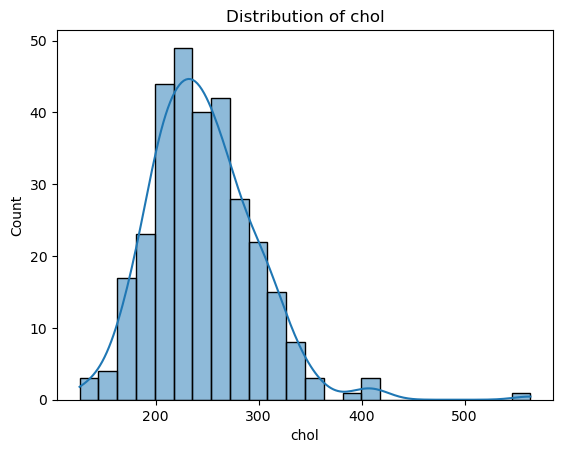

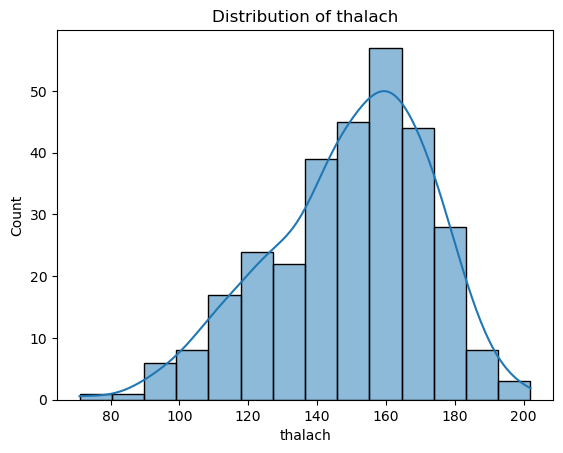

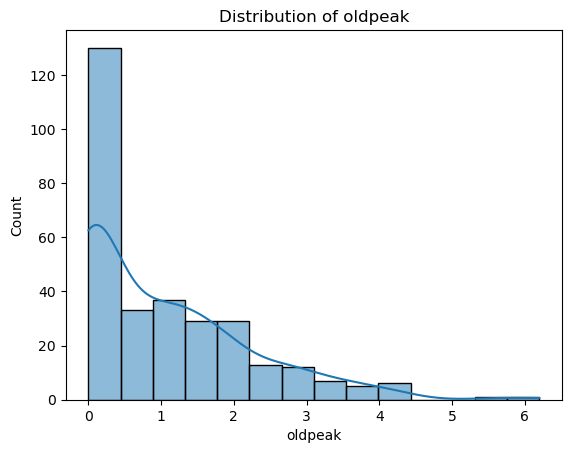

In [22]:
# Plot distributions for key numeric features
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in numeric_features:
    plt.figure()
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

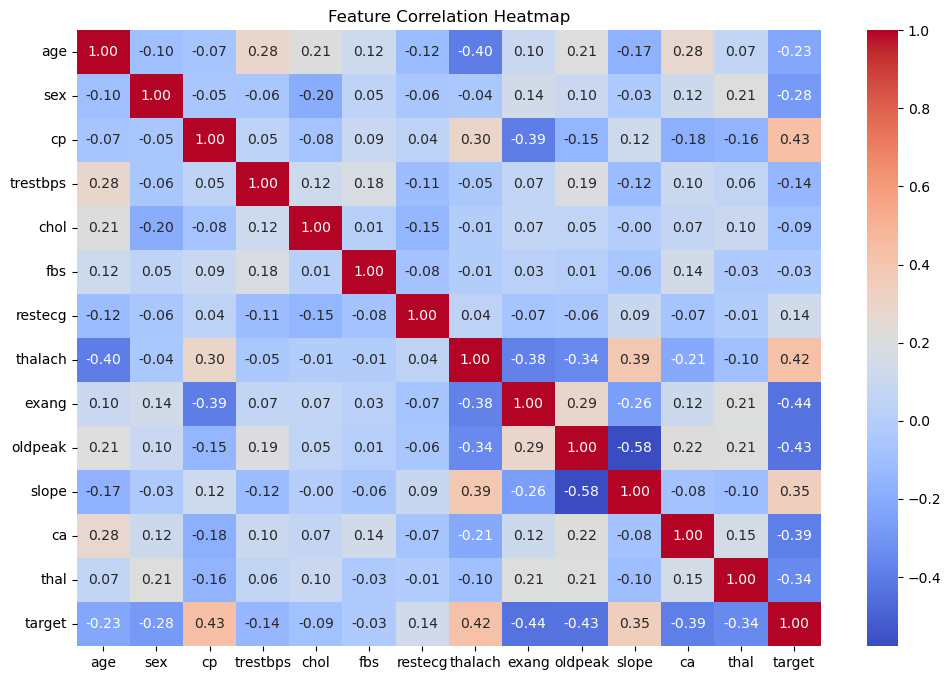

In [24]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# OBSERVATIONS 

Relationships :<br><br>

Strong Positive Correlations:<br>

cp (chest pain) and target: A strong positive correlation (0.43) indicates that higher chest pain types are associated with the target variable (likely the presence of heart disease).<br>

thalach (maximum heart rate) and target: Positive correlation (0.42) suggests that higher maximum heart rates are associated with the target variable.<br<br><br>

Strong Negative Correlations:<br>

*exang (exercise-induced angina) and target: A strong negative correlation (-0.44) suggests that exercise-induced angina is less likely associated with the target (possibly no heart disease).<br>

oldpeak (ST depression) and target: A significant negative correlation (-0.43) indicates that higher ST depression values are inversely related to the target variable.




IMPORTANT FEATURES : cp,thalach,exang,oldpeak,slope,ca,thal<br>
Based on correlation matrix<br>

In [29]:
# checking handled data
prep_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [31]:
# Separate features and label(Target)
x=prep_data.drop("target",axis=1)  # Features
y=prep_data["target"] # Target variable

# DATA SPLIT

In [34]:
# Split Data for Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print shape of training and testing set features
print("Shape of Training Data:", X_train.shape)
print("Shape of Testing Data:", X_test.shape)

Shape of Training Data: (242, 13)
Shape of Testing Data: (61, 13)


# FEATURE NORMALIZATION

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MODEL IMPLEMENTATION 

In [40]:
#  6. Define models for comparison
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [42]:
# 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f"{name} - Mean Accuracy: {cv_results.mean()}")

Logistic Regression - Mean Accuracy: 0.805952380952381
Random Forest - Mean Accuracy: 0.810204081632653
SVM - Mean Accuracy: 0.8059523809523809
Gradient Boosting - Mean Accuracy: 0.8225340136054422
K-Nearest Neighbors - Mean Accuracy: 0.8140306122448979


# HYPERPARAMETER TUNING 

In [45]:
# Hyperparameter tuning using GridSearchCV
# Example for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best parameters for Random Forest: {grid_search.best_params_}")

Best parameters for Random Forest: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 100}


# FINAL MODEL

In [54]:
# Final Model Evaluation on Test Data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84        29
         1.0       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Accuracy on Test Set: 0.8524590163934426


In [56]:
# Compare all models on the test data
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred)}")

Logistic Regression - Accuracy: 0.8524590163934426
Random Forest - Accuracy: 0.8360655737704918
SVM - Accuracy: 0.8688524590163934
Gradient Boosting - Accuracy: 0.7868852459016393
K-Nearest Neighbors - Accuracy: 0.9016393442622951


# Model Evaluation: Training and Test Plot

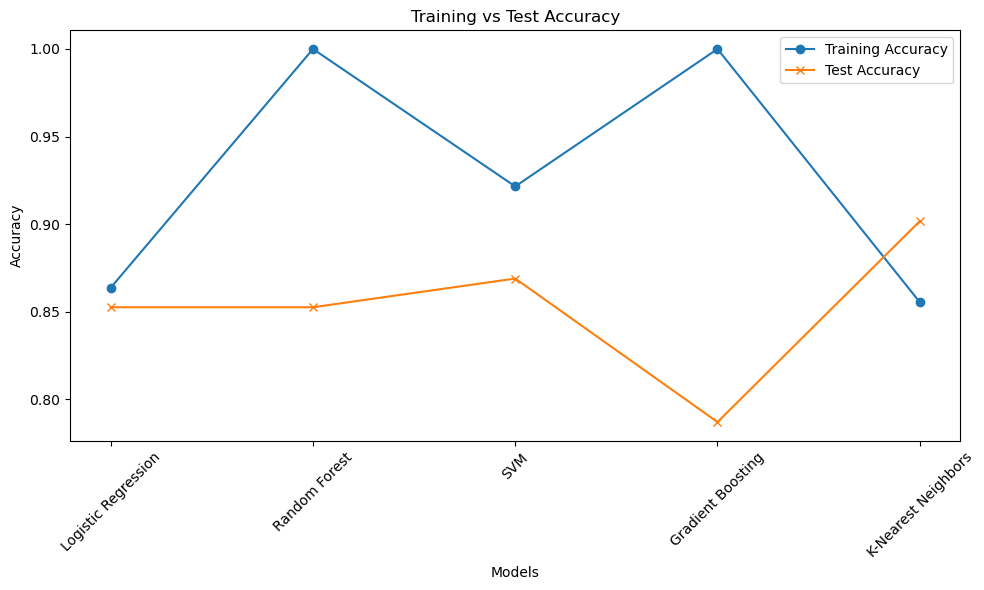

In [59]:
train_accuracies = []
test_accuracies = []

for name, model in models.items():
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label='Training Accuracy', marker='o')
plt.plot(test_accuracies, label='Test Accuracy', marker='x')
plt.xticks(range(len(models)), models.keys(), rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


# BIAS AND VARIANCE

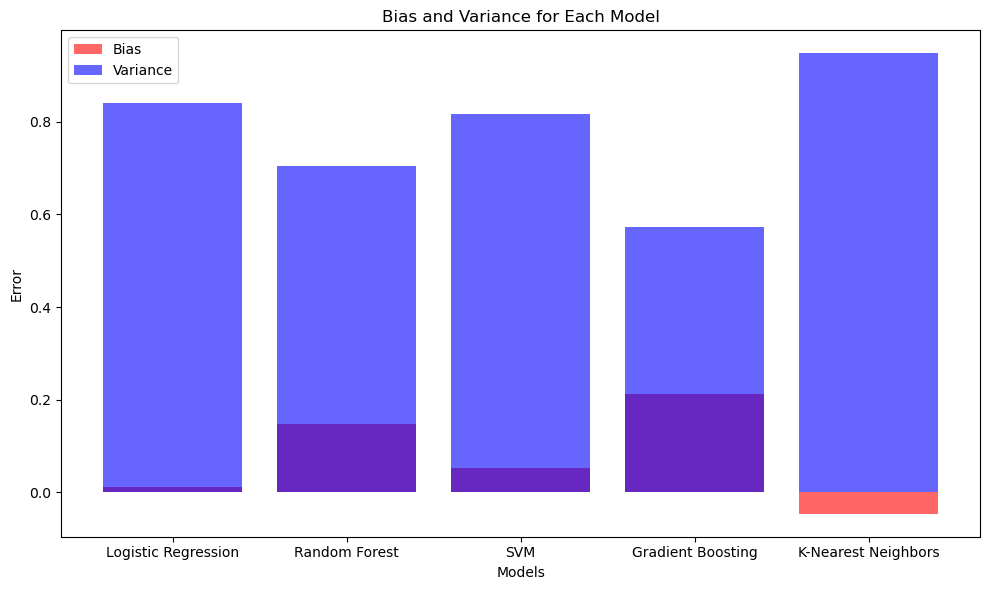

In [62]:
# Plot Bias and Variance
bias = np.array(train_accuracies) - np.array(test_accuracies)
variance = np.array(test_accuracies) - np.array(bias)

plt.figure(figsize=(10, 6))
plt.bar(models.keys(), bias, color='r', alpha=0.6, label='Bias')
plt.bar(models.keys(), variance, color='b', alpha=0.6, label='Variance')
plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Bias and Variance for Each Model')
plt.legend()
plt.tight_layout()
plt.show()

# MODEL PERFORMANCE

Logistic Regression has high bias and relatively low variance, indicating that it's underfitting the data.<br>
Random Forest has a balance between bias and variance, with slightly higher variance than bias, suggesting it’s neither underfitting nor overfitting.<br>
SVM shows a good balance between bias and variance, but the exact levels are not as clear as Random Forest.<br>
Gradient Boosting seems to have relatively low bias but with a noticeable variance component, suggesting that it’s performing reasonably well but could benefit from further tuning to reduce overfitting.<br>
K-Nearest Neighbors (KNN) shows very high variance and high bias, indicating it is severely overfitting the training data and is not a good model for this dataset.<br>

In [64]:
# RMSE (Root Mean Squared Error) of the final model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE for the best model: {rmse}")

RMSE for the best model: 0.31362502409359
